# 1.Linear Regression

In [1]:
import tensorflow as tf
import numpy as np

w = tf.Variable(tf.random.uniform([1]))
b = tf.Variable(tf.random.uniform([1]))

x = np.arange(0,8,1)
y = [20,23,25,30,33,34,35,43]

In [2]:
# 손실 함수를 정의합니다.
def loss_function():
    pred_y = tf.add(tf.multiply(x, w), b)
    cost = tf.reduce_mean(tf.square(pred_y - y))
    return cost

step_arr = []
loss_arr = []

# 옵티마이저를 설정합니다.
opt = tf.optimizers.Adam(learning_rate=0.01)

# 훈련 루프를 설정합니다.
for step in range(10000):
    # 옵티마이저로 손실 함수를 최소화합니다.
    opt.minimize(loss_function, var_list=[w, b])
    if step % 100 == 0:
        print(step, 'Loss_value:', loss_function().numpy(), 'weight:', w.numpy()[0], 'bias:', b.numpy()[0])
        step_arr.append(step)
        loss_arr.append(loss_function().numpy())

0 Loss_value: 889.8057 weight: 0.27492326 bias: 0.274301
100 Loss_value: 632.26685 weight: 1.2418784 bias: 1.2463839
200 Loss_value: 440.27896 weight: 2.1139164 bias: 2.139826
300 Loss_value: 302.5564 weight: 2.8834167 bias: 2.9512722
400 Loss_value: 207.67892 weight: 3.5466857 bias: 3.6811182
500 Loss_value: 145.16653 weight: 4.102316 bias: 4.3318567
600 Loss_value: 105.85872 weight: 4.551981 bias: 4.908395
700 Loss_value: 82.21559 weight: 4.9009275 bias: 5.418062
800 Loss_value: 68.4549 weight: 5.1579237 bias: 5.8702555
900 Loss_value: 60.48092 weight: 5.3345876 bias: 6.2757163
1000 Loss_value: 55.631607 weight: 5.4442225 bias: 6.645606
1100 Loss_value: 52.32676 weight: 5.5004506 bias: 6.9905667
1200 Loss_value: 49.712708 weight: 5.5159936 bias: 7.320002
1300 Loss_value: 47.372143 weight: 5.501819 bias: 7.6415977
1400 Loss_value: 45.122772 weight: 5.4667444 bias: 7.961196
1500 Loss_value: 42.896294 weight: 5.4174256 bias: 8.282873
1600 Loss_value: 40.67418 weight: 5.3586173 bias: 8.6

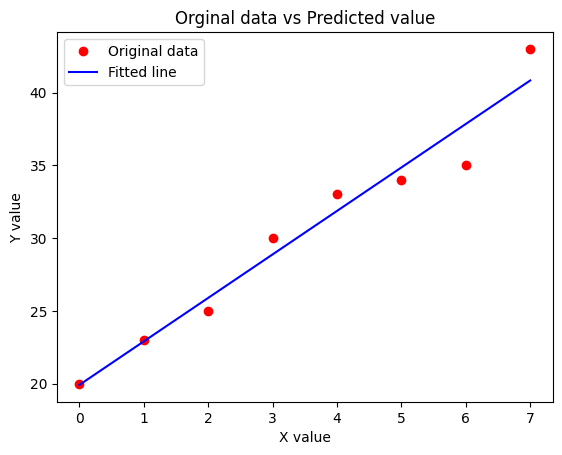

In [3]:
import matplotlib.pyplot as plt
pred_y_list=w*x+b #위에서 구한 weight와 bias값을 이용해 y값 prediction

# original data plot
plt.title("Orginal data vs Predicted value")
plt.xlabel("X value")
plt.ylabel("Y value")
plt.plot(x, y, 'ro', label='Original data')

# predicted value plot
plt.plot(x, pred_y_list,'b', label='Fitted line')
plt.legend()
plt.show()

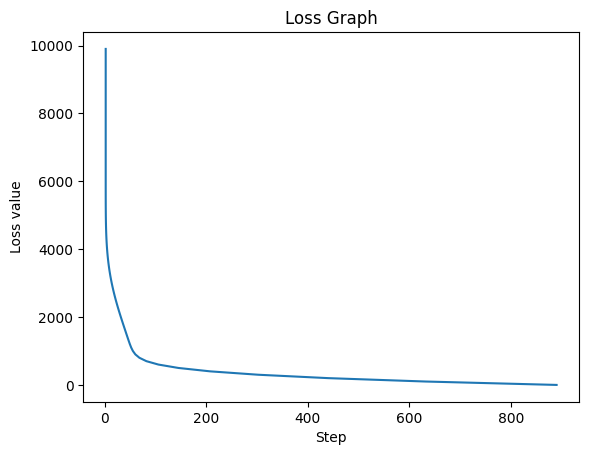

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
plt.title("Loss Graph")
plt.xlabel("Step")
plt.ylabel("Loss value")
plt.plot(loss_arr,step_arr)
plt.show()

# 2.Logistic Regression

In [5]:
w = tf.Variable(tf.random.uniform([1,1]))
b = tf.Variable(tf.random.uniform([1]))

x=np.array([[2],[3],[4],[6],[8],[11],[13],[14],[15]],dtype=np.float32)
y=np.array([[0],[0],[0],[0],[0],[1],[1],[1],[1]],dtype=np.float32)

In [6]:
def loss_function():
  z = tf.matmul(x,w) + b
  pred_y = tf.sigmoid(z)
  cost = -tf.reduce_mean(y * tf.math.log(pred_y) + (1 - y) * tf.math.log(1 - pred_y))
  return cost

optimizer = tf.optimizers.Adam(learning_rate=0.01)

for step in range(10000):
    cost_val=optimizer.minimize(loss_function, var_list=[w,b])
    if step % 100 == 0:
        print(step,"loss_value:", loss_function().numpy(), 'weight:', w.numpy()[0], 'bias:', b.numpy()[0])

0 loss_value: 2.7476175 weight: [0.86948663] bias: 0.9238864
100 loss_value: 0.6457044 weight: [0.04828261] bias: 0.03920051
200 loss_value: 0.541451 weight: [0.11705978] bias: -0.46119493
300 loss_value: 0.45180452 weight: [0.1690937] bias: -0.99610317
400 loss_value: 0.3795942 weight: [0.21997163] bias: -1.5119702
500 loss_value: 0.3234964 weight: [0.2678316] bias: -1.9938425
600 loss_value: 0.280095 weight: [0.31228524] bias: -2.4396064
700 loss_value: 0.24615544 weight: [0.3535161] bias: -2.8521144
800 loss_value: 0.21917081 weight: [0.39190242] bias: -3.2356484
900 loss_value: 0.19732459 weight: [0.42785043] bias: -3.5944924
1000 loss_value: 0.17932597 weight: [0.4617317] bias: -3.93245
1100 loss_value: 0.16425604 weight: [0.49386656] bias: -4.2527475
1200 loss_value: 0.15145354 weight: [0.52452403] bias: -4.558075
1300 loss_value: 0.14043579 weight: [0.55392796] bias: -4.850659
1400 loss_value: 0.1308446 weight: [0.58226454] bias: -5.1323495
1500 loss_value: 0.12240974 weight: [0

In [7]:
pred_y = tf.sigmoid(tf.matmul(x,w)+b)
pred_final = tf.cast(pred_y > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred_final,y),dtype=tf.float32))
print("accuracy:", accuracy.numpy())

accuracy: 1.0


In [8]:
# Test
test_x=np.array([[1],[16]],dtype=np.float32)
test_y=np.array([[0],[1]],dtype=np.float32)

test_pred= tf.sigmoid(tf.matmul(test_x,w)+b)
test_pred_final= tf.cast(test_pred > 0.5,dtype=tf.float32) #0,1로 구성된 모델이 예측한 데이터
test_accuracy = tf.reduce_mean(tf.cast(tf.equal(test_pred_final,test_y),dtype=tf.float32)) #test_accuracy
print("accuracy:", test_accuracy.numpy())

accuracy: 1.0


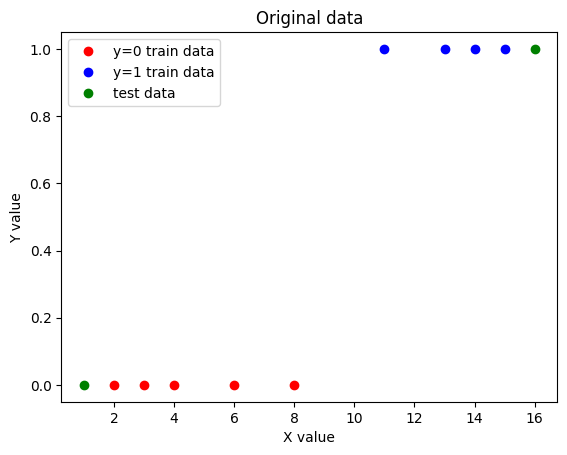

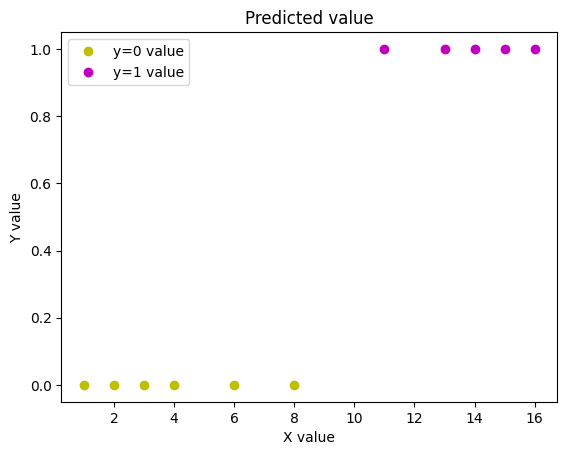

In [9]:
test_pred_final=np.array(test_pred_final)
pred_final=np.array(pred_final)

#시각화를 위해 label y가 0인 데이터와 1인 데이터를 분리한 후, 결과 plot
label_x_0=x[y==0]
label_x_1=x[y==1]
label_y_0=y[y==0]
label_y_1=y[y==1]
# original data plot
plt.title("Original data")
plt.xlabel("X value")
plt.ylabel("Y value")
plt.plot(label_x_0, label_y_0, 'ro', label='y=0 train data')
plt.plot(label_x_1, label_y_1,'bo', label='y=1 train data')
plt.plot(test_x, test_y,'go', label='test data')
plt.legend()
plt.show()

pred_final_0=pred_final[pred_final==0]
pred_final_1=pred_final[pred_final==1]

test_pred_x_0=test_x[test_pred_final==0]
test_pred_x_1=test_x[test_pred_final==1]
test_pred_final_0=test_pred_final[test_pred_final==0]
test_pred_final_1=test_pred_final[test_pred_final==1]
# preidicted value plot
plt.title("Predicted value")
plt.xlabel("X value")
plt.ylabel("Y value")
plt.plot(label_x_0, pred_final_0, 'yo', label='y=0 value')
plt.plot(label_x_1, pred_final_1,'mo', label='y=1 value')
plt.plot(test_pred_x_0, test_pred_final_0,'yo')
plt.plot(test_pred_x_1, test_pred_final_1,'mo')
plt.legend()
plt.show()

[ 2.  3.  4.  6.  8. 11. 13. 14. 15.]


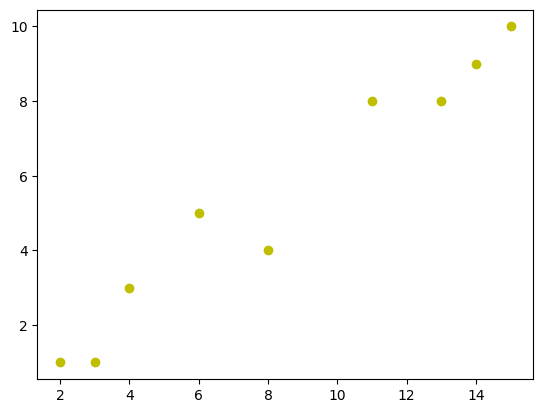

In [10]:
# 2D
w = tf.Variable(tf.random.uniform([2,1]))
b = tf.Variable(tf.random.uniform([1]))

label_x=np.array([[2,1],[3,1],[4,3],[6,5],[8,4],[11,8],[13,8],[14,9],[15,10]],dtype=np.float32) #input data
label_y=np.array([[0],[0],[0],[0],[0],[1],[1],[1],[1]],dtype=np.float32) #output data

t=label_x[:,0]
print(t)
c=label_x[:,1]
plt.plot(t,c, 'yo', label='y=0 value')
plt.show()

In [11]:
#loss function 정의
def loss_function():
#sigmoid function으로 pred_y값을 도출하고 cross entropy loss를 loss function으로 loss 값도출
  z= tf.matmul(label_x,w)+b
  pred_y = tf.sigmoid(z)
  cost = -tf.reduce_mean(label_y * tf.math.log(pred_y) + (1 - label_y) * tf.math.log(1 - pred_y))#cross entropy loss를 loss function으로 활용
  return cost
optimizer = tf.optimizers.Adam(learning_rate=0.01) #보편적으로 가장 많이 사용하는 adam optimizer 활용

for step in range(10000): #train
    cost_val=optimizer.minimize(loss_function, var_list=[w,b])
    if step % 100 == 0:
        print(step,"loss_value:", loss_function().numpy(), 'weight:', w.numpy()[0], w.numpy()[1], 'bias:', b.numpy()[0])

0 loss_value: 2.5241456 weight: [0.7441209] [0.18839844] bias: 0.5588139
100 loss_value: 0.61557734 weight: [0.25730693] [-0.24650308] bias: -0.1923156
200 loss_value: 0.49466515 weight: [0.24166803] [-0.13480002] bias: -0.79272044
300 loss_value: 0.3976379 weight: [0.22419941] [-0.01997484] bias: -1.3831005
400 loss_value: 0.32592732 weight: [0.208878] [0.08553471] bias: -1.9272714
500 loss_value: 0.2732924 weight: [0.19728772] [0.17838079] bias: -2.4222949
600 loss_value: 0.23383076 weight: [0.18959464] [0.25902665] bias: -2.874578
700 loss_value: 0.20338668 weight: [0.18539715] [0.329138] bias: -3.2917287
800 loss_value: 0.17923956 weight: [0.184133] [0.39052728] bias: -3.680284
900 loss_value: 0.159617 weight: [0.18524489] [0.44481486] bias: -4.0454073
1000 loss_value: 0.14334269 weight: [0.18823738] [0.49335536] bias: -4.3910832
1100 loss_value: 0.1296145 weight: [0.19269209] [0.53725123] bias: -4.720392
1200 loss_value: 0.117869645 weight: [0.19826536] [0.5773899] bias: -5.035745

In [12]:
# test data 설정 및 학습한 모델로 predict
test_x=np.array([[6,4],[12,6]],dtype=np.float32)
test_y=np.array([[0],[1]],dtype=np.float32)

test_pred= tf.sigmoid(tf.matmul(test_x,w)+b)
test_pred_final= tf.cast(test_pred > 0.5,dtype=tf.float32) #0,1로 구성된 모델이 예측한 데이터
test_accuracy = tf.reduce_mean(tf.cast(tf.equal(test_pred_final,test_y),dtype=tf.float32)) #test_accuracy
print("accuracy:", test_accuracy.numpy())

accuracy: 1.0


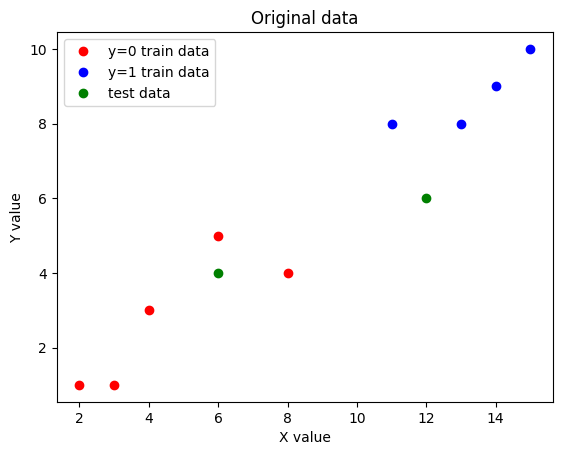

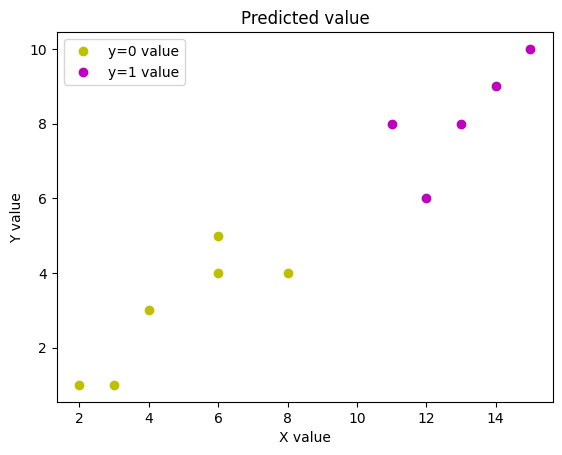

In [13]:
import matplotlib.pyplot as plt
test_pred_final=np.array(test_pred_final)
pred_final=np.array(pred_final)
#label_x,test_x 데이터에서 x축, y축 데이터 분리
label_x_x1=label_x[:,0]
label_x_y1=label_x[:,1]

test_x_x1=test_x[:,0]
test_x_y1=test_x[:,1]

#시각화를 위해 label y가 0인 데이터와 1인 데이터를 분리한 후, 결과 plot
label_y=np.squeeze(label_y)
test_pred_final=np.squeeze(test_pred_final)
pred_final=np.squeeze(pred_final)

label_x_x1_0=label_x_x1[label_y==0]
label_x_x1_1=label_x_x1[label_y==1]
label_x_y1_0=label_x_y1[label_y==0]
label_x_y1_1=label_x_y1[label_y==1]
# original data plot
plt.title("Original data")
plt.xlabel("X value")
plt.ylabel("Y value")
plt.plot(label_x_x1_0, label_x_y1_0, 'ro', label='y=0 train data')
plt.plot(label_x_x1_1, label_x_y1_1,'bo', label='y=1 train data')
plt.plot(test_x_x1, test_x_y1,'go', label='test data')
plt.legend()
plt.show()


pred_x_x1_0=label_x_x1[pred_final==0]
pred_x_x1_1=label_x_x1[pred_final==1]
pred_x_y1_0=label_x_y1[pred_final==0]
pred_x_y1_1=label_x_y1[pred_final==1]

pred_test_x_x1_0=test_x_x1[test_pred_final==0]
pred_test_x_x1_1=test_x_x1[test_pred_final==1]
pred_test_x_y1_0=test_x_y1[test_pred_final==0]
pred_test_x_y1_1=test_x_y1[test_pred_final==1]

# preidicted value plot
plt.title("Predicted value")
plt.xlabel("X value")
plt.ylabel("Y value")
plt.plot(pred_x_x1_0, pred_x_y1_0, 'yo', label='y=0 value')
plt.plot(pred_x_x1_1, pred_x_y1_1,'mo', label='y=1 value')
plt.plot(pred_test_x_x1_0, pred_test_x_y1_0,'yo')
plt.plot(pred_test_x_x1_1, pred_test_x_y1_1,'mo')
plt.legend()
plt.show()

# 3.Multivariable linear regression

In [15]:
import tensorflow as tf

w1 = tf.Variable(tf.random.uniform([1]))
w2 = tf.Variable(tf.random.uniform([1]))
w3 = tf.Variable(tf.random.uniform([1]))
b = tf.Variable(tf.random.uniform([1]))

label_x1 = [10,30,40,60,70]
label_x2 = [34,12,44,22,50]
label_x3 = [12,4,34,5,30]
label_y = [61,54,140,91,165]

In [18]:
def loss_function():
  pred_y = w1 * label_x1 + w2 * label_x2 + w3 * label_x3 + b
  cost = tf.reduce_mean(tf.square(pred_y - label_y))
  return cost

step_arr = []
loss_arr = []

# 옵티마이저를 설정합니다.
opt = tf.optimizers.Adam(learning_rate=0.01)

for step in range(10000):
    cost_val=opt.minimize(loss_function, var_list=[w1,w2,w3,b])
    if step % 100 == 0:
        print(step,"loss_value:", loss_function().numpy(), 'weight:', w1.numpy(),w2.numpy(),w3.numpy(), 'bias:', b.numpy()[0])
        step_arr.append(step)
        loss_arr.append(loss_function().numpy())

0 loss_value: 9.586034 weight: [1.0287595] [1.0455847] [1.4366452] bias: 0.63726926
100 loss_value: 5.5247893 weight: [1.0464981] [0.82572] [1.7136338] bias: 1.7069008
200 loss_value: 4.2998 weight: [1.0412985] [0.7856287] [1.7496959] bias: 2.6832514
300 loss_value: 3.3114731 weight: [1.0362867] [0.7503986] [1.7806959] bias: 3.5788944
400 loss_value: 2.5132623 weight: [1.0316336] [0.71801406] [1.8091202] bias: 4.40605
500 loss_value: 1.8754028 weight: [1.0273374] [0.6882587] [1.8352054] bias: 5.1677575
600 loss_value: 1.3732839 weight: [1.0234001] [0.6610572] [1.8590357] bias: 5.8649397
700 loss_value: 0.9849752 weight: [1.0198245] [0.6363791] [1.8806499] bias: 6.498007
800 loss_value: 0.69087553 weight: [1.0165063] [0.6141812] [1.8999362] bias: 7.067172
900 loss_value: 0.47290945 weight: [1.013729] [0.5945183] [1.91727] bias: 7.5734434
1000 loss_value: 0.31542444 weight: [1.0112185] [0.5772397] [1.9323971] bias: 8.018255
1100 loss_value: 0.20456819 weight: [1.0090233] [0.56219065] [1.

tf.Tensor([ 61.  54. 140.  91. 165.], shape=(5,), dtype=float32)


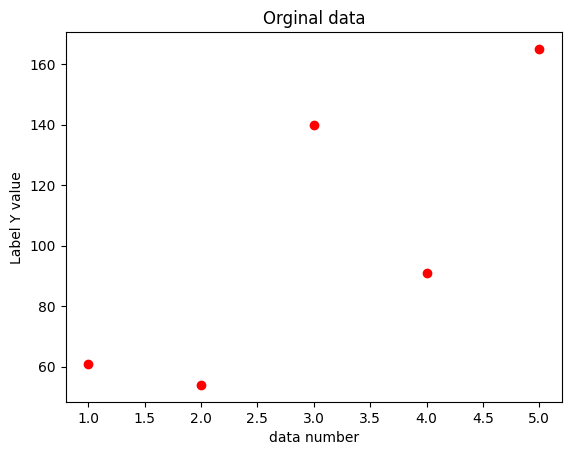

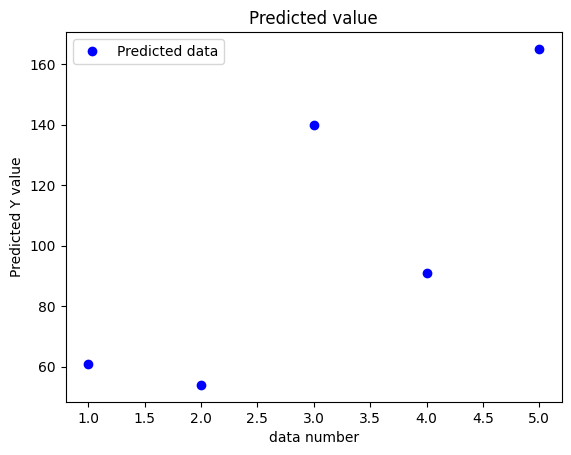

In [21]:
import matplotlib.pyplot as plt
pred_y_list= w1*label_x1+w2*label_x2+w3*label_x3+ b#위에서 구한 weight와 bias값을 이용해 y값 prediction
print(pred_y_list) #실제 y값과 비교
data_number=[1,2,3,4,5]
# original data plot
plt.title("Orginal data")
plt.xlabel("data number")
plt.ylabel("Label Y value")
plt.plot(data_number, label_y, 'ro', label='Original data')
plt.show()
# predicted value plot
plt.title("Predicted value")
plt.xlabel("data number")
plt.ylabel("Predicted Y value")
plt.plot(data_number, pred_y_list,'bo', label='Predicted data')
plt.legend()
plt.show()

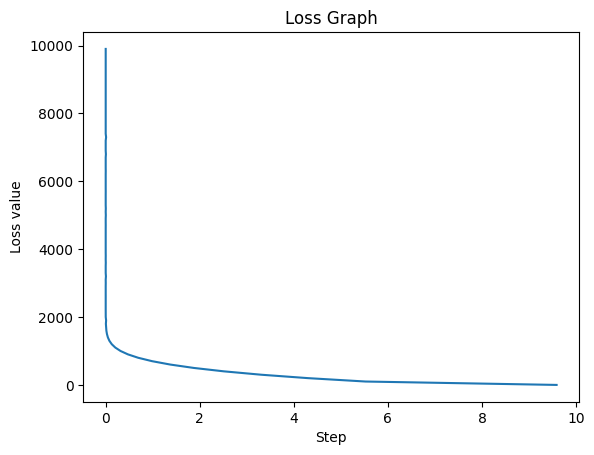

In [20]:
plt.title("Loss Graph")
plt.xlabel("Step")
plt.ylabel("Loss value")
plt.plot(loss_arr,step_arr)
plt.show()

# 4.Softmax Classification

In [22]:
w = tf.Variable(tf.random.uniform([2,3]))
b = tf.Variable(tf.random.uniform([3]))

label_x=np.array([[3,2],[2,2],[2,3],[3,4],[1,5],[5,5],[5,7],[6,6],[7,5],[8,5],[6,11],[7,12],[8,10],[9,11],[10,10]],dtype=np.float32)
label_y=np.array([[1,0,0],[1,0,0],[1,0,0],[1,0,0],[1,0,0],[0,1,0],[0,1,0],[0,1,0],[0,1,0],[0,1,0],[0,0,1],[0,0,1],[0,0,1],[0,0,1],[0,0,1]],dtype=np.float32)

In [25]:
def loss_function():
  z = tf.matmul(label_x,w)+b
  pred_y = tf.nn.softmax(z)
  cost = -tf.reduce_mean(tf.reduce_sum(label_y * tf.math.log(pred_y), axis=1))
  return cost

optimizer = tf.optimizers.Adam(learning_rate=0.01)

for step in range(10000):
  cost_val = optimizer.minimize(loss_function, var_list=[w,b])
  if step % 100 == 0:
    print(step,"loss_value:",loss_function().numpy())

0 loss_value: 1.441687
100 loss_value: 0.61795425
200 loss_value: 0.47620645
300 loss_value: 0.39329645
400 loss_value: 0.3372898
500 loss_value: 0.29532912
600 loss_value: 0.2618845
700 loss_value: 0.23422867
800 loss_value: 0.21082334
900 loss_value: 0.19070369
1000 loss_value: 0.17321406
1100 loss_value: 0.15788253
1200 loss_value: 0.14435376
1300 loss_value: 0.13235147
1400 loss_value: 0.12165476
1500 loss_value: 0.11208387
1600 loss_value: 0.10348981
1700 loss_value: 0.09574796
1800 loss_value: 0.08875278
1900 loss_value: 0.08241443
2000 loss_value: 0.07665577
2100 loss_value: 0.071410544
2200 loss_value: 0.06662137
2300 loss_value: 0.062238477
2400 loss_value: 0.058218602
2500 loss_value: 0.054523777
2600 loss_value: 0.051120996
2700 loss_value: 0.047981285
2800 loss_value: 0.04507889
2900 loss_value: 0.042391356
3000 loss_value: 0.039898638
3100 loss_value: 0.037583057
3200 loss_value: 0.03542879
3300 loss_value: 0.033421848
3400 loss_value: 0.031549726
3500 loss_value: 0.029801

In [28]:
pred_y = tf.nn.softmax(tf.matmul(label_x,w)+b)
argmax_y = tf.argmax(label_y, 1)
pred_final = tf.argmax(pred_y,1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred_final, argmax_y), dtype=tf.float32))
print("accuracy:",accuracy.numpy())

accuracy: 1.0


In [29]:
test_x=np.array([[1,3],[6,5],[10,11]],dtype=np.float32)
test_y=np.array([[1,0,0],[0,1,0],[0,0,1]],dtype=np.float32)

test_pred = tf.nn.softmax(tf.matmul(test_x,w)+b)
test_argmax_y = tf.argmax(test_y,1)
test_pred_final = tf.argmax(test_pred,1)
test_accuracy = tf.reduce_mean(tf.cast(tf.equal(test_pred_final,test_argmax_y),dtype=tf.float32))
print("test_accuracy:",test_accuracy.numpy())

test_accuracy: 1.0


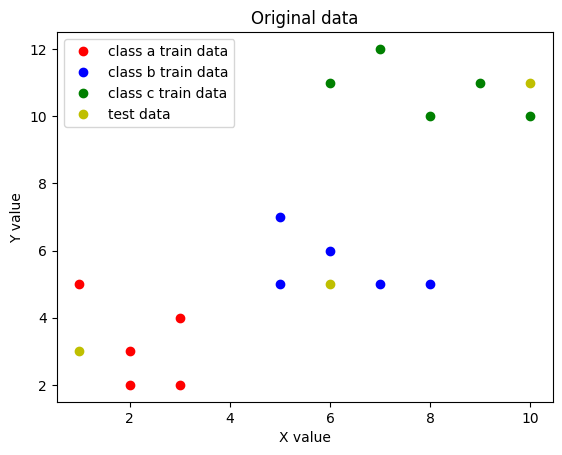

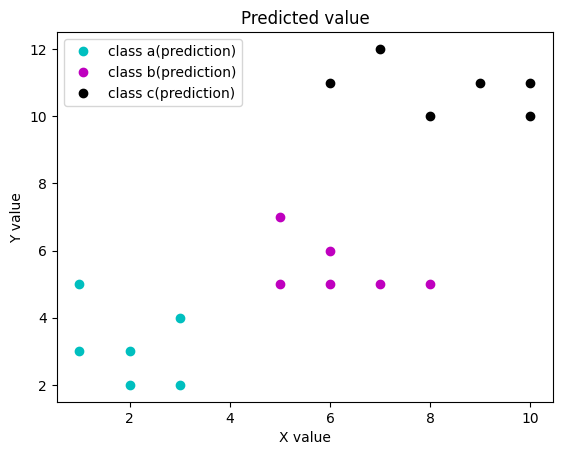

In [30]:
import matplotlib.pyplot as plt
test_pred_final=np.array(test_pred_final)
pred_final=np.array(pred_final)
argmax_y=np.array(argmax_y)
#label_x,test_x 데이터에서 x축, y축 데이터 분리
label_x_x1=label_x[:,0]
label_x_y1=label_x[:,1]

test_x_x1=test_x[:,0]
test_x_y1=test_x[:,1]

#시각화를 위해 class a([1,0,0]), b([0,1,0]), c([0,0,1])에 따라서 데이터를 분리한 후, 결과 plot
label_x_x1_0=label_x_x1[argmax_y==0]
label_x_x1_1=label_x_x1[argmax_y==1]
label_x_x1_2=label_x_x1[argmax_y==2]
label_x_y1_0=label_x_y1[argmax_y==0]
label_x_y1_1=label_x_y1[argmax_y==1]
label_x_y1_2=label_x_y1[argmax_y==2]
# original data plot
plt.figure()
plt.title("Original data")
plt.xlabel("X value")
plt.ylabel("Y value")
plt.plot(label_x_x1_0, label_x_y1_0, 'ro', label='class a train data')
plt.plot(label_x_x1_1, label_x_y1_1,'bo', label='class b train data')
plt.plot(label_x_x1_2, label_x_y1_2,'go', label='class c train data')
plt.plot(test_x_x1, test_x_y1,'yo', label='test data')
plt.legend()
plt.show()

pred_x_x1_0=label_x_x1[pred_final==0]
pred_x_x1_1=label_x_x1[pred_final==1]
pred_x_x1_2=label_x_x1[pred_final==2]
pred_x_y1_0=label_x_y1[pred_final==0]
pred_x_y1_1=label_x_y1[pred_final==1]
pred_x_y1_2=label_x_y1[pred_final==2]

pred_test_x_x1_0=test_x_x1[test_pred_final==0]
pred_test_x_x1_1=test_x_x1[test_pred_final==1]
pred_test_x_x1_2=test_x_x1[test_pred_final==2]
pred_test_x_y1_0=test_x_y1[test_pred_final==0]
pred_test_x_y1_1=test_x_y1[test_pred_final==1]
pred_test_x_y1_2=test_x_y1[test_pred_final==2]

# preidicted value plot
plt.figure()
plt.title("Predicted value")
plt.xlabel("X value")
plt.ylabel("Y value")
plt.plot(pred_x_x1_0, pred_x_y1_0, 'co', label='class a(prediction)')
plt.plot(pred_x_x1_1, pred_x_y1_1,'mo', label='class b(prediction)')
plt.plot(pred_x_x1_2, pred_x_y1_2,'ko', label='class c(prediction)')
plt.plot(pred_test_x_x1_0, pred_test_x_y1_0,'co')
plt.plot(pred_test_x_x1_1, pred_test_x_y1_1,'mo')
plt.plot(pred_test_x_x1_2, pred_test_x_y1_2,'ko')
plt.legend()
plt.show()

In [38]:
# exampel file
!wget https://github.com/hunkim/DeepLearningZeroToAll/raw/master/data-04-zoo.csv

--2024-02-27 07:23:22--  https://github.com/hunkim/DeepLearningZeroToAll/raw/master/data-04-zoo.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hunkim/DeepLearningZeroToAll/master/data-04-zoo.csv [following]
--2024-02-27 07:23:23--  https://raw.githubusercontent.com/hunkim/DeepLearningZeroToAll/master/data-04-zoo.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4485 (4.4K) [text/plain]
Saving to: ‘data-04-zoo.csv’

data-04-zoo.csv     100%[===================>]   4.38K  --.-KB/s    in 0s      

2024-02-27 07:23:23 (36.4 MB/s) - ‘data-04-zoo.csv’ saved [4485/4485]



In [39]:
all_data = np.loadtxt('/content/data-04-zoo.csv',delimiter=',', dtype=np.float32)

In [49]:
class_number = 7
feature_number = 16

train_x = all_data[:-10,0:-1]
train_y = all_data[:-10,[-1]]

test_x = all_data[-10:,0:-1]
test_y = all_data[-10:,[-1]]

train_y_one_hot = tf.one_hot(np.array(train_y), class_number)
final_train_y = tf.reshape(train_y_one_hot, [-1, class_number])

test_y_one_hot = tf.one_hot(np.array(test_y), class_number)
final_test_y = tf.reshape(test_y_one_hot, [-1,class_number])

In [52]:
# class 수와 피쳐 수에 따라서 wight와 bias 변수 설정
w = tf.Variable(tf.random.uniform([feature_number,class_number]))
b = tf.Variable(tf.random.uniform([class_number]))

In [53]:
def loss_function():
  z = tf.matmul(train_x,w)+b
  softmax_result = tf.nn.softmax_cross_entropy_with_logits(logits=z, labels=final_train_y)
  cost = tf.reduce_mean(softmax_result)
  return cost

optimizer = tf.optimizers.Adam(learning_rate=0.01)
for step in range(10000):
  cost_val = optimizer.minimize(loss_function, var_list = [w,b])
  if step % 1000 == 0:
    print(step, "loss_value:",loss_function().numpy())

0 loss_value: 2.463889
1000 loss_value: 0.014279784
2000 loss_value: 0.004260516
3000 loss_value: 0.0018971695
4000 loss_value: 0.0009819944
5000 loss_value: 0.00054627773
6000 loss_value: 0.00031578468
7000 loss_value: 0.00018649313
8000 loss_value: 0.00011152025
9000 loss_value: 6.715066e-05


In [54]:
#최종 train accuracy 측정
pred_y = tf.nn.softmax(tf.matmul(train_x,w)+b)
argmax_y=tf.argmax(final_train_y,1) #label 데이터의 argmax
pred_final = tf.argmax(pred_y,1)#모델이 예측한 pred_y 데이터의 argmax
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred_final,argmax_y),dtype=tf.float32)) #train_accuracy
print("Train accuracy:", accuracy.numpy())

Train accuracy: 1.0


In [55]:
#test data 설정 및 학습한 모델로 predict
test_pred= tf.nn.softmax(tf.matmul(test_x,w)+b)
test_argmax_y=tf.argmax(final_test_y ,1)
test_pred_final= tf.argmax(test_pred,1)
test_accuracy = tf.reduce_mean(tf.cast(tf.equal(test_pred_final,test_argmax_y),dtype=tf.float32)) #test_accuracy
print("Test accuracy:", test_accuracy.numpy())

Test accuracy: 1.0
